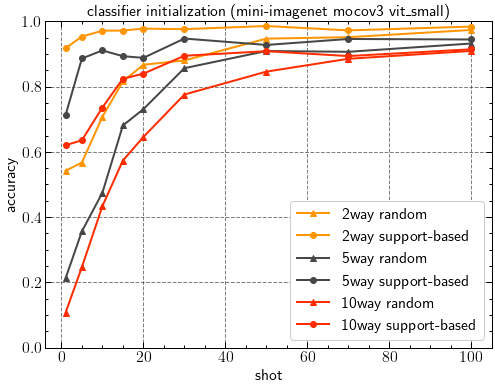

In [1]:
# support init or not
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['science', 'grid','notebook',])
plt.rc('text', usetex=True)
supp_yes = {}
supp_no = {}

def read_txt(fn, supp):
    with open(fn, 'r') as f:
        for line in f.readlines():
            tokens = line.split(' ')
            supp[tokens[1]] = float(tokens[2][:8])


read_txt(fn="result\\randInit_2022-04-17-04-43-22\\2022-04-17-04-43-22.txt", supp=supp_no)
read_txt(fn="result\\supportInit_2022-04-17-03-57-15\\2022-04-17-03-57-15.txt", supp=supp_yes)

way_list = [2, 5, 10]
shot_list =  [ 1, 5, 10, 15, 20, 30, 50, 70, 100]
dataset_ins = "mini-imagenet"
model_ins = ["mocov3", 'vit_small']
for way_ins in way_list:
        y_no = []
        y_yes = []
        y = []
        for shot_ins in shot_list:
            k = f"{way_ins}way-{shot_ins}shot"
            y_no.append(supp_no[k])
            y_yes.append(supp_yes[k])
          

        plt.plot(np.array(shot_list), np.array(y_no), '^-', color=f"C{way_ins}", label=f"{way_ins}way random")
        plt.plot(np.array(shot_list), np.array(y_yes), 'o-', color=f"C{way_ins}", label=f"{way_ins}way support-based")
plt.title(f'classifier initialization ({dataset_ins} {model_ins[0]} {model_ins[1]})')
plt.ylim(0.0, 1.0)
plt.xlabel('shot')
plt.ylabel('accuracy')
plt.legend()

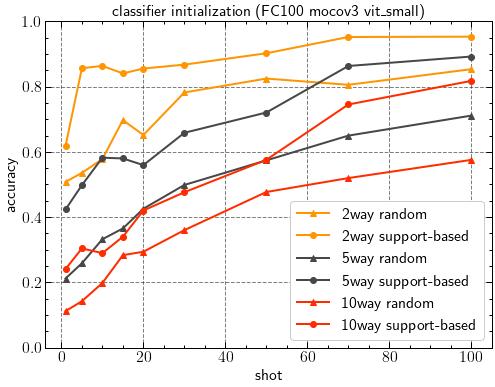

In [3]:
# support init or not
import numpy as np
import matplotlib.pyplot as plt

supp_yes = {}
supp_no = {}

def read_txt(fn, supp):
    with open(fn, 'r') as f:
        for line in f.readlines():
            tokens = line.split(' ')
            supp[tokens[1]] = float(tokens[2][:8])


read_txt(fn="result\\rand-fc100_2022-04-17-08-15-57\\2022-04-17-08-15-57.txt", supp=supp_no)
read_txt(fn="result\\suppout-fc100_2022-04-17-07-34-45\\2022-04-17-07-34-45.txt", supp=supp_yes)

way_list = [2, 5, 10]
shot_list =  [ 1, 5, 10, 15, 20, 30, 50, 70 ,100]
dataset_ins = "FC100"
model_ins = ["mocov3", 'vit_small']
for way_ins in way_list:
        y_no = []
        y_yes = []
        y = []
        for shot_ins in shot_list:
            k = f"{way_ins}way-{shot_ins}shot"
            y_no.append(supp_no[k])
            y_yes.append(supp_yes[k])
          

        plt.plot(np.array(shot_list), np.array(y_no), '^-', color=f"C{way_ins}", label=f"{way_ins}way  random")
        plt.plot(np.array(shot_list), np.array(y_yes), 'o-', color=f"C{way_ins}", label=f"{way_ins}way support-based")
plt.title(f'classifier initialization ({dataset_ins} {model_ins[0]} {model_ins[1]})')
plt.ylim(0.0, 1.0)
plt.xlabel('shot')
plt.ylabel('accuracy')
plt.legend()

In [1]:
import numpy as np

b = np.random.dirichlet(np.ones(10), size=2)
print(b)

[[0.15199964 0.01314237 0.28651308 0.09401016 0.00328008 0.02976784
  0.0863827  0.24436351 0.0605964  0.0299442 ]]


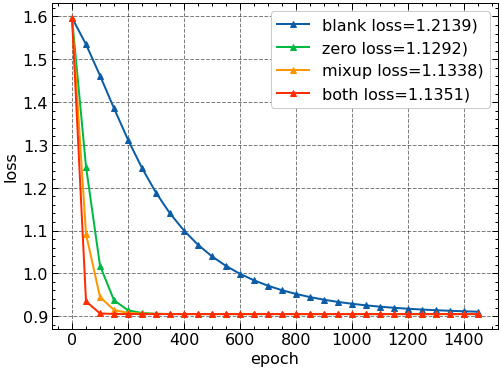

In [16]:
import matplotlib.pyplot as plt
import json
plt.style.use(['science', 'grid','notebook',])

la = 'loss'
with open('result\DEBUG_2022-04-24-00-39-06-406\FC100-vit_small-5way-1shot.json', 'r') as f:
    d = json.loads(f.read())

for l in ['blank', 'zero', 'mixup', 'both']:
    t = d[f"{la}_{l}_t"]
    plt.plot(np.array(d['x']), np.array(d[f"{la}_{l}"]), '^-', label=f"{l} {la}={t:.4f})")
plt.xlabel('epoch')
plt.ylabel(la)
plt.legend()

In [94]:
from PIL import Image
 
img = Image.open('F:\\FSICS\\dataset\\mini-imagenet\\val\\n01855672\\n0185567200000051.jpg')
imgGrey = img.convert('L')
 
img.save('img_copy.jpg')
imgGrey.save('img_gray.jpg')


width, height = img.size


box = (42, 0,84, 42)
region = img.crop(box)
region.resize((840, 84),Image.BILINEAR)
region.save('img_crop.jpg')
# img_NEARESET = img.resize((width//2, height//2))  # 缩放默认模式是NEARESET(最近邻插值)
# img_BILINEAR = img.resize((width//2, height//2), Image.BILINEAR)  # BILINEAR 2x2区域的双线性插值
# img_BICUBIC = img.resize((width//2, height//2), Image.BICUBIC)  # BICUBIC 4x4区域的双三次插值
# img_ANTIALIAS = img.resize((width//2, height//2), Image.ANTIALIAS) 
# img_NEARESET.save('img_resize.jpg')
import torchvision
jitter = torchvision.transforms.ColorJitter(brightness=0.6, contrast=0.8, saturation=3.5, hue=0.4)
img_jitter = jitter(img)
img_jitter.save('img_jitter.jpg')

In [100]:
import cv2
import numpy as np
img = cv2.imread("F:\\FSICS\\dataset\\mini-imagenet\\val\\n01855672\\n0185567200000051.jpg")
# 图像归一化
fi = img / 255.0
# 伽马变换
gamma = 0.2
out = np.power(fi, gamma)
cv2.imwrite('img_gamma.jpg', out*255)


kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], np.float32) #定义一个核
img_test = cv2.filter2D(img, -1, kernel=kernel)
cv2.imwrite("img_sharpning.jpg", img_test)

True

In [106]:
import cv2
import numpy as np
 
# Read image
img = cv2.imread("F:\\FSICS\\dataset\\mini-imagenet\\val\\n01855672\\n0185567200000051.jpg")
img2 = cv2.imread("F:\\FSICS\\dataset\\mini-imagenet\\val\\n01855672\\n0185567200000052.jpg")
out = cv2.addWeighted(img, 0.6, img2, 0.4,0)

cv2.imwrite("img_mixup.jpg", out)

error: OpenCV(4.5.5) :-1: error: (-5:Bad argument) in function 'addWeighted'
> Overload resolution failed:
>  - addWeighted() missing required argument 'gamma' (pos 5)
>  - addWeighted() missing required argument 'gamma' (pos 5)


In [60]:
import PIL
rotate = img.rotate(270)
rotate.save('img_rotate90.jpg')

flip = Image.open('img_crop(2).jpg')
flip = flip.transpose(Image.FLIP_LEFT_RIGHT)
flip.save('img_flip.jpg')

offset =  PIL.ImageChops.offset(img,40,40)
offset.save('img_offset.jpg')

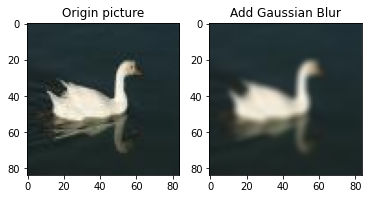

In [64]:
from matplotlib import pyplot as plt
import cv2
import pylab
impath = "F:\\FSICS\\dataset\\mini-imagenet\\val\\n01855672\\n0185567200000051.jpg"
kernel_size = (5,5)
sigma = 1.5
img11 = cv2.imread(impath)
# BGR -> RGB
b,g,r=cv2.split(img11)
img11=cv2.merge([r,g,b])
# BGR -> RGB
# img2=img[: , : , : : -1]
img1 = img11/255.00
img2 = cv2.GaussianBlur(img1,kernel_size,sigma)
cv2.imwrite('img_gaussian_blur.jpg', img2*255)
# cv2.imwrite(blur_image, img2)
plt.figure(1)
plt.subplot(121)
plt.imshow(img1)
plt.title("Origin picture")
plt.subplot(122)
plt.imshow(img2)
plt.title("Add Gaussian Blur")
#plt.savefig("blur_image.jpg")
pylab.show()

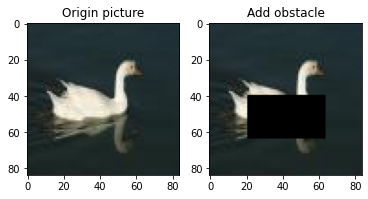

In [36]:
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw
import pylab
import numpy as np
impath = "F:\\FSICS\\dataset\\mini-imagenet\\val\\n01855672\\n0185567200000051.jpg"
img1 = Image.open(impath)
img1 = np.asarray(img1)/255.00
img2 = Image.open(impath)
draw = ImageDraw.Draw(img2)
draw.rectangle((21,40,63,63), fill = (0,0,0))
img2.save('img_cutout.jpg')
img2 = np.asarray(img2)/255.00
plt.figure(1)
plt.subplot(121)
plt.imshow(img1)
plt.title("Origin picture")
plt.subplot(122)
plt.imshow(img2)
plt.title("Add obstacle")
#plt.savefig("obstacle_image.jpg")
pylab.show()

<class 'numpy.ndarray'>


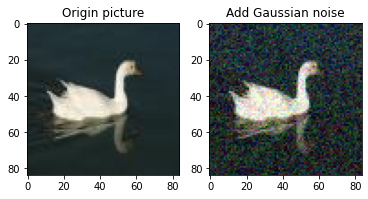

In [54]:
from matplotlib import pyplot as plt
from skimage import io
import skimage
import pylab
impath = "F:\\FSICS\\dataset\\mini-imagenet\\val\\n01855672\\n0185567200000051.jpg"
image = io.imread(impath)
img1 = image / 255.00
img2 = skimage.util.random_noise(image,mode='gaussian',seed=None,clip=True)
print(type(image))
a = Image.fromarray((img2*255).astype('uint8')).convert('RGB')
a.save('img_gaussian.jpg')
plt.figure(1)
plt.subplot(121)
plt.imshow(img1)
plt.title("Origin picture")
plt.subplot(122)
plt.imshow(img2)
plt.title("Add Gaussian noise")
pylab.show()
#plt.savefig("noise_image.jpg")

ValueError: The parameter `image` must be a 2-dimensional array

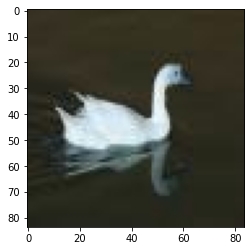

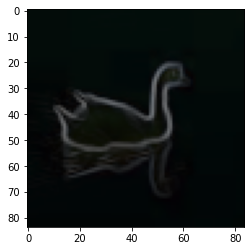

In [71]:
from skimage import data,filters,img_as_ubyte
import matplotlib.pyplot as plt
import cv2

# 图像读取
img = cv2.imread('F:\\FSICS\\dataset\\mini-imagenet\\val\\n01855672\\n0185567200000051.jpg')
plt.imshow(img,plt.cm.gray)

# '''**********skimage*************'''
# # sobel边缘检测
edges = filters.sobel(img)
cv2.imwrite('img_sobel2.jpg', edges*255)

# 浮点型转成uint8型
edges = img_as_ubyte(edges)
# 显示图像
plt.figure()
plt.imshow(edges,plt.cm.gray) 

# sobel 水平方向边缘检测
edgesh = filters.sobel_h(img)
edgesh = img_as_ubyte(edgesh)
plt.figure()
plt.imshow(edgesh,plt.cm.gray)

# sobel 竖直方向边缘检测
edgesv = filters.sobel_v(img)
edgesv = img_as_ubyte(edgesv)
plt.figure()
plt.imshow(edgesv,plt.cm.gray) 

'''**********opencv*************'''
# sobel边缘检测
edges = cv2.Sobel(img,cv2.CV_16S,1,1) 
cv2.imwrite('img_sobel.jpg', edges)
# 浮点型转成uint8型
edges = cv2.convertScaleAbs(edges)
plt.figure()
plt.imshow(edges,plt.cm.gray) 

# sobel 水平方向边缘检测
edges = cv2.Sobel(img,cv2.CV_16S,1,0) 
edgesh = cv2.convertScaleAbs(edgesh) 
plt.figure()
plt.imshow(edgesh,plt.cm.gray) 

# sobel 竖直方向边缘检测
edges = cv2.Sobel(img,cv2.CV_16S,0,1) 
edgesv = cv2.convertScaleAbs(edgesv) 
plt.figure()
plt.imshow(edgesv,plt.cm.gray) 

Episode 0
Support Set (5way-1shot)


<Figure size 576x432 with 0 Axes>

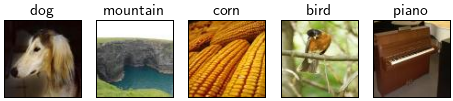

Query Set (20 images)


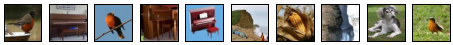

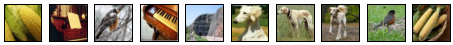

build a classifier ... Done.(accuracy=1.00)


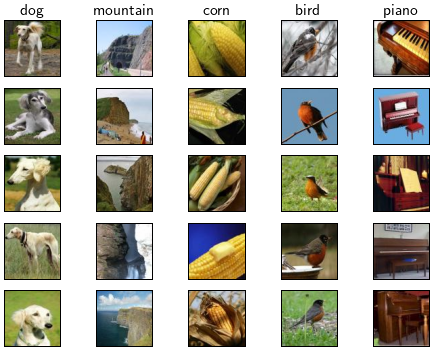

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import random
# functions to show an image
plt.style.use(['science','notebook',])
plt.rc('text', usetex=True)

way = ["dog", "mountain", "corn", "bird", 'piano']

plt.figure()
fig, ax =  plt.subplots(1, len(way))
for i in range(len(way)):
    img = PIL.Image.open(f"F:\\support\\{way[i]}\\{5}.jpg")
    ax[i].imshow(img)
    ax[i].set_title(f"{way[i]}")
    ax[i].set_xticks([])
    ax[i].set_yticks([])
print("Episode 0")
print(f"Support Set ({len(way)}way-1shot)")
plt.show()


query_set = []
for i in range(len(way)):
    for j in range(5):
        query_set.append(f"F:\\support\\{way[i]}\\{j}.jpg")

unordered = random.sample(range(0, len(query_set)), len(query_set))

print(f"Query Set (20 images)")
fig, ax =  plt.subplots(nrows=1, ncols=10)
for i in range(10):
        img = PIL.Image.open(query_set[unordered[i]])
        ax[i].imshow(img)
        ax[i].set_xticks([])
        ax[i].set_yticks([])
plt.show()
fig, ax =  plt.subplots(nrows=1, ncols=10)
for i in range(10,20):
        img = PIL.Image.open(query_set[unordered[i]])
        ax[i-10].imshow(img)
        ax[i-10].set_xticks([])
        ax[i-10].set_yticks([])
plt.show()
fig, ax =  plt.subplots(nrows=5, ncols=5)
for i in range(len(way)):
    for j in range(5):
        img = PIL.Image.open(f"F:\\support\\{way[i]}\\{j}.jpg")
        if(j == 0):
             ax[j,i].set_title(way[i])   
        ax[j,i].imshow(img)
        ax[j,i].set_xticks([])
        ax[j,i].set_yticks([])
print(f"build a classifier ... Done.(accuracy=1.00)")
plt.show()



<Figure size 576x432 with 0 Axes>

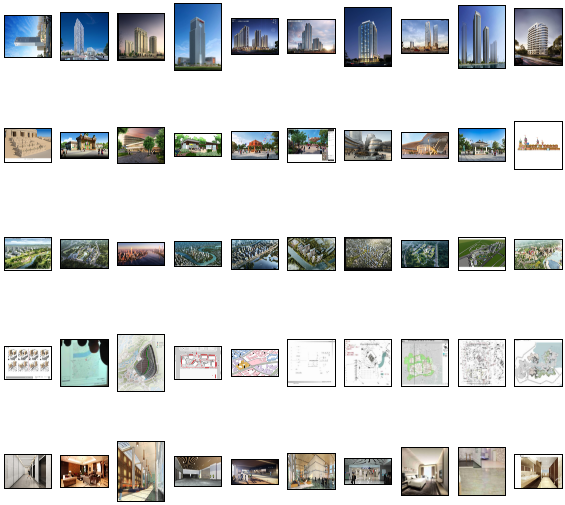

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import random
# functions to show an image

way = ["high-rise", "low-rise", "bird-eye", "drawing", "indoor"]

plt.figure()
fig, ax =  plt.subplots(len(way), 10, figsize=(10,10))
for i in range(len(way)):
    for j in range(10):
        plt.subplots_adjust(hspace = 0.0001, wspace = 0.2 ) 
        img = PIL.Image.open(f"F:\\FSICS\\dataset\\support_real\\{way[i]}\\{j}.jpg")

        img.resize((20,20))
        ax[i,j].imshow(img)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
fig.savefig("real_support.jpg", bbox_inches='tight')


In [10]:
import cv2
import os
import random

M = 15
N = 12

def f(WAY):
    list_2d = []
    ROOT = f"real_result\\{WAY}"
    paths = os.listdir(ROOT)
    print(len(paths))
    sample = random.sample(range(0, len(paths)),M*N)
    for i in range(M):
        tmp = []
        for j in range(N):
            img = cv2.imread(os.path.join(ROOT, paths[sample[i * N + j]]))
            img = cv2.resize(img, (200, 200))
            tmp.append(img)
        list_2d.append(tmp)

    # show the output image
    final = cv2.vconcat([cv2.hconcat(list_h) 
                            for list_h in list_2d])
    cv2.imwrite(f"real-{WAY}.jpg",final)

for i in range(5):
    f(i)

439
205
454
485
904


In [7]:
import cv2
import os
import random

way = [2,4,0,1,3]
N = 10

list_2d = []
for w in way:
    tmp = []
    ROOT = f"real_result\\{w}"
    paths = os.listdir(ROOT)
    sample = random.sample(range(0, len(paths)), N)
    for i in range(N):
        img = cv2.imread(os.path.join(ROOT, paths[sample[i]]))
        img = cv2.resize(img, (200, 200))
        tmp.append(img)
    
    list_2d.append(tmp)
final = cv2.vconcat([cv2.hconcat(list_h) 
                            for list_h in list_2d])
cv2.imwrite(f"real.jpg",final)



True